In [ ]:
import torch

x = torch.rand(5, 3)
print(x)

tensor([[0.5048, 0.5313, 0.1420],
        [0.0244, 0.6406, 0.1104],
        [0.0580, 0.6450, 0.6537],
        [0.6961, 0.6263, 0.2737],
        [0.9112, 0.1875, 0.0763]])


In [ ]:
import torch

torch.cuda.is_available()

True

# Tutoriales pytorch

## How to load data in pytorch

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
train_data = datasets.FashionMNIST(
    root="../data", train=True, download=True, transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="../data", train=False, download=True, transform=ToTensor()
)

100.0%
100.0%
100.0%
100.0%


In [ ]:
batch_size = 64

train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape if X [N,C,H,W] {X.shape}")
    print(f"Shape if y {y.shape}")

Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])
Shape if X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape if y torch.Size([64])

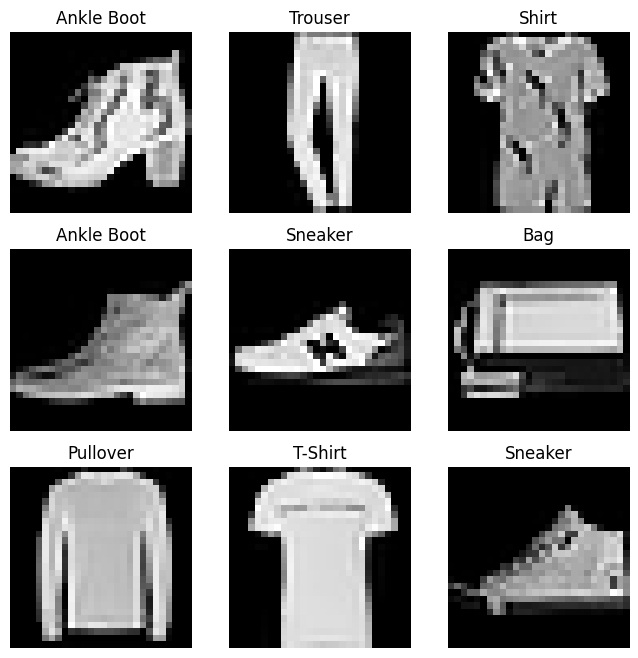

In [14]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import decode_image


# Para no gastar memoria por ejemplo se recomienda cargar imagen por imagen las imagenes del dataset, asegurandonos que la memoria no se llene.
class CustomImageDataset(Dataset):
    # Esto se crea la primera vez que creamos el init este solo se ejecuta la primera vez que instanciamos la clase
    def __init__(
        self, annotations_file, img_dir, transform=None, target_transform=None
    ):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    # El returna el numero de elementos que tenemos
    def __len__(self):
        return len(self.img_labels)

    # El get item retorna un elemento en un indice especifico
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [16]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


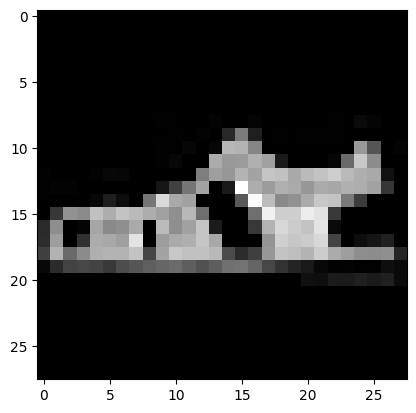

Label: 5


In [17]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Creating Models 

In [ ]:
device = (
    torch.accelerator.current_accelerator().type
    if torch.accelerator.is_available()
    else "cpu"
)
print(f"Using {device} device")


# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()